<a href="https://colab.research.google.com/github/joaquin03estrada/IA/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Cargar el conjunto de datos MNIST, que ya está dividido en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Explora la forma de los datos
print("Forma de las imágenes de entrenamiento:", train_images.shape)
print("Número de etiquetas de entrenamiento:", len(train_labels))
print("Forma de las imágenes de prueba:", test_images.shape)
print("Número de etiquetas de prueba:", len(test_labels))

Forma de las imágenes de entrenamiento: (60000, 28, 28)
Número de etiquetas de entrenamiento: 60000
Forma de las imágenes de prueba: (10000, 28, 28)
Número de etiquetas de prueba: 10000


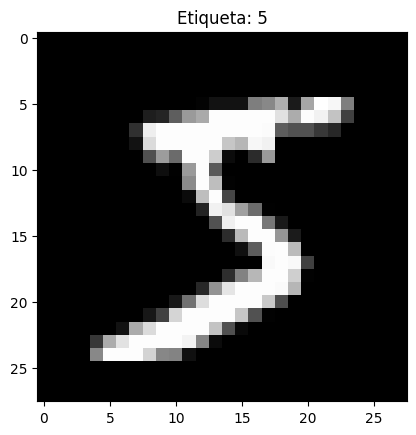

In [4]:
# Visualiza un ejemplo (opcional)
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Etiqueta: {train_labels[0]}")
plt.show()

In [5]:
# Normalizar las imágenes para que los valores de los píxeles estén entre 0 y 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [6]:
# Convertir las etiquetas a codificación one-hot
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [7]:
print("Forma de las etiquetas de entrenamiento después de one-hot encoding:", train_labels.shape)
print("Forma de las etiquetas de prueba después de one-hot encoding:", test_labels.shape)

Forma de las etiquetas de entrenamiento después de one-hot encoding: (60000, 10)
Forma de las etiquetas de prueba después de one-hot encoding: (10000, 10)


In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen de 28x28 a un vector de 784
    Dense(128, activation='relu'),   # Capa densa con 128 neuronas y función de activación ReLU
    Dense(num_classes, activation='softmax') # Capa de salida con 10 neuronas (una por cada clase) y función de activación softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Mostrar la arquitectura del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
epochs = 10  # Número de veces que el modelo recorrerá todo el conjunto de entrenamiento
batch_size = 32 # Número de muestras por lote durante el entrenamiento

In [12]:
history = model.fit(train_images, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2) # Usar el 20% de los datos de entrenamiento para la validación

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8696 - loss: 0.4736 - val_accuracy: 0.9556 - val_loss: 0.1522
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9603 - loss: 0.1344 - val_accuracy: 0.9690 - val_loss: 0.1133
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9728 - loss: 0.0907 - val_accuracy: 0.9688 - val_loss: 0.1016
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9682 - val_loss: 0.1091
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9716 - val_loss: 0.0919
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9896 - loss: 0.0354 - val_accuracy: 0.9725 - val_loss: 0.0956
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9918 - loss: 0.0278 - val_accuracy: 0.9717 - val_loss: 0.0975
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9938 - loss: 0.022

In [13]:
loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

Pérdida en el conjunto de prueba: 0.0967
Precisión en el conjunto de prueba: 0.9733


In [14]:
import numpy as np

In [15]:
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [16]:
print("Predicciones:", predicted_labels)
print("Etiquetas verdaderas:", true_labels)

Predicciones: [7 2 1 0 4 1 4 9 5 9]
Etiquetas verdaderas: [7 2 1 0 4 1 4 9 5 9]


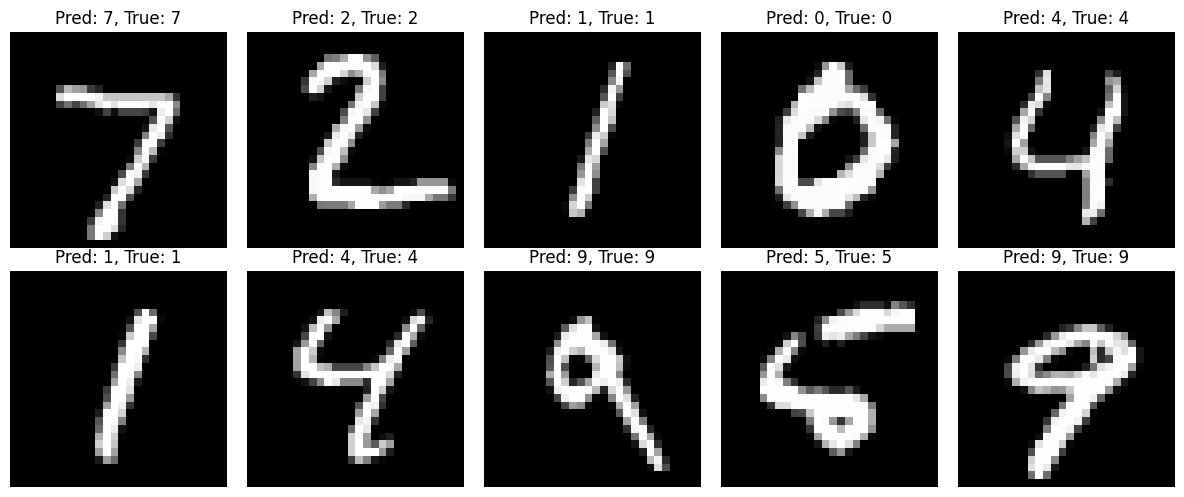

In [18]:
# Visualiza las predicciones
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(test_images[i], cmap='gray')
    axes[i].set_title(f"Pred: {predicted_labels[i]}, True: {true_labels[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()